In [4]:
from google.cloud import bigquery
client = bigquery.Client

In [5]:
pip install pandas-gbq

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install google-cloud-bigquery

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import pandas_gbq
from google.cloud import bigquery
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Initialize BigQuery client
client = bigquery.Client()

/opt/conda/lib/python3.10/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
/opt/conda/lib/python3.10/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [9]:
# Run SQL query
query = """
SELECT *
FROM 
  `yhcr-prd-bradfor-bia-core.CB_2514_Analysis_Tables.PredictionModel`
"""

In [10]:
# Read data from BigQuery into DataFrame
df = pandas_gbq.read_gbq(query, project_id='yhcr-prd-bradfor-bia-core')

# Display DataFrame
print(df)

/opt/conda/lib/python3.10/site-packages/google/auth/_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


Downloading: 100%|██████████|
        person_id  age  gender  ethnicity ctv3code  \
0             197   17       0          7    XaAnp   
1             230   59       0          7    XaAlZ   
2             272   20       0          0    XaaCX   
3             272   20       0          0    XaaCX   
4             406  101       0          0    XaAkj   
...           ...  ...     ...        ...      ...   
981632   14989081    2    <NA>          0    XaNUL   
981633   15032782    1    <NA>          7    XaNUL   
981634   15033417    1    <NA>          7    XaNUL   
981635   15036451   65       0          0    XaNUL   
981636   16768699   53       1          0    XaNUL   

                                                 ctv3text FirstEventDate  \
0                       Discharge from orthoptics service     2012-09-03   
1             Discharge from respiratory medicine service     2019-07-22   
2       Discharge from child and adolescent mental hea...     2019-10-03   
3       Discharge

In [11]:
# Step 2: Remove rows where 'gender_source_value' is NA
df= df.dropna(subset=['gender'])
# Step 3: Save the cleaned DataFrame to a CSV file
df.to_csv('cleaned_data_after_gender_drop.csv', index=False)

In [12]:
# To drop duplicates
print(df.drop_duplicates())

        person_id  age  gender  ethnicity ctv3code  \
0             197   17       0          7    XaAnp   
1             230   59       0          7    XaAlZ   
2             272   20       0          0    XaaCX   
3             272   20       0          0    XaaCX   
4             406  101       0          0    XaAkj   
...           ...  ...     ...        ...      ...   
981629   14789932    2       1          8    XaNUL   
981630   14794573   48       1          0    XaNUL   
981631   14947040   81       1          0    XaNUL   
981635   15036451   65       0          0    XaNUL   
981636   16768699   53       1          0    XaNUL   

                                                 ctv3text FirstEventDate  \
0                       Discharge from orthoptics service     2012-09-03   
1             Discharge from respiratory medicine service     2019-07-22   
2       Discharge from child and adolescent mental hea...     2019-10-03   
3       Discharge from child and adolescent men

TypeError: reduction operation 'argmin' not allowed for this dtype

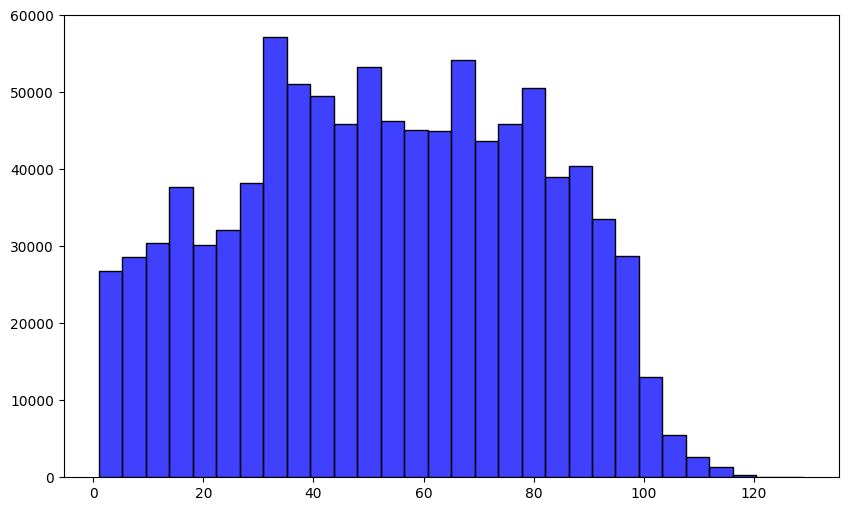

In [13]:
# Plotting the histogram of the 'age' column
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=False, color='blue')  # You can adjust the number of bins

In [14]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')  # Convert non-numeric to NaN

In [15]:
df['age'].dropna(inplace=True)  # Remove rows with NaN values in the 'age' column

TypeError: reduction operation 'argmin' not allowed for this dtype

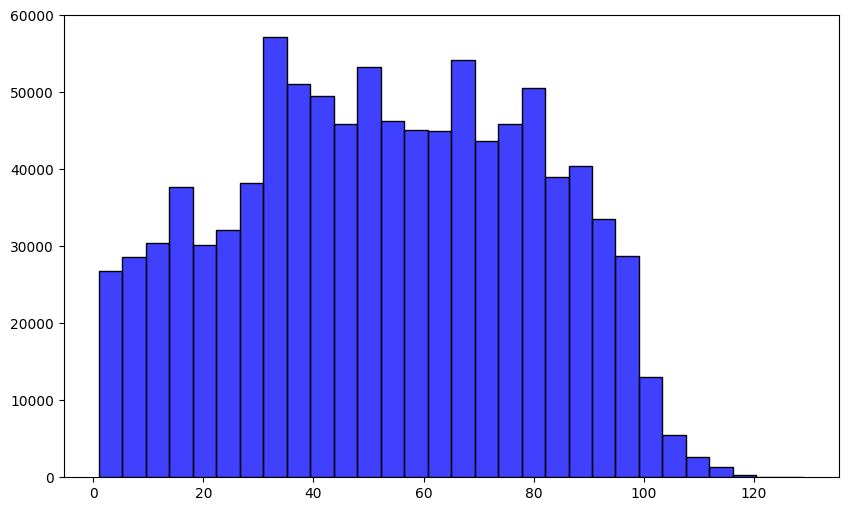

In [16]:
# Assuming df is your DataFrame containing the 'age' column
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=False, color='blue')  # Adjust the number of bins as needed
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Reshape the data into a 2D array for the scaler and fit_transform
age_normalized = scaler.fit_transform(df['age'].values.reshape(-1, 1))

# Add the normalized age back to the DataFrame
df['age_normalized_minmax'] = age_normalized

# Display the first few rows to check
print(df[['age', 'age_normalized_minmax']].head())


   age  age_normalized_minmax
0   17               0.125000
1   59               0.453125
2   20               0.148438
3   20               0.148438
4  101               0.781250


In [18]:
# Assuming you have already added the normalized column (age_normalized_minmax or age_standardized)
df.to_csv('normalized_age_data.csv', index=False)  # Save the DataFrame to a CSV file

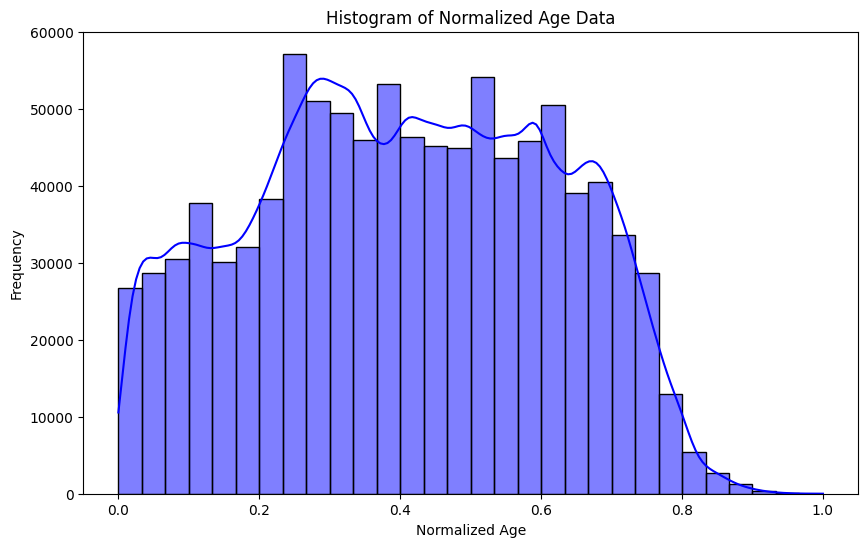

In [19]:
# Assuming df['age_normalized_minmax'] contains the normalized data
plt.figure(figsize=(10, 6))
sns.histplot(df['age_normalized_minmax'], bins=30, kde=True, color='blue')  # You can adjust the number of bins
plt.title('Histogram of Normalized Age Data')
plt.xlabel('Normalized Age')
plt.ylabel('Frequency')
plt.show()


In [21]:
# Assuming df is your DataFrame
df_cleaned = df.drop(columns=['person_id','age', 'ctv3code', 'ctv3text', 'FirstEventDate', 'NextEventDate'])

# Display the updated DataFrame to confirm
df_cleaned.head()

,gender,ethnicity,DaysBetweenEvents,ReadmissionStatus,age_normalized_minmax
0,0,7,0,0,0.125000
1,0,7,0,0,0.453125
2,0,0,0,1,0.148438
3,0,0,292,0,0.148438
4,0,0,0,0,0.781250


In [22]:
# Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('cleaned_data.csv', index=False)  # Change the filename as needed

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
import matplotlib.pyplot as plt

In [24]:
# Step 1: Load the cleaned DataFrame
df_cleaned = pd.read_csv('cleaned_data.csv')

In [25]:
# Step 2: Define your features (X) and target variable (y)
X = df_cleaned.drop('ReadmissionStatus', axis=1)  # Replace with your target column name
y = df_cleaned['ReadmissionStatus']

In [26]:
# Step 3: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test

In [27]:
# Step 4: Train the Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
# Step 5: Make Predictions
y_pred = rf_model.predict(X_test)

In [29]:
# Step 6: Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.928783595542445
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96    172263
           1       1.00      0.40      0.57     23001

    accuracy                           0.93    195264
   macro avg       0.96      0.70      0.76    195264
weighted avg       0.93      0.93      0.91    195264

Confusion Matrix:
 [[172226     37]
 [ 13869   9132]]


In [30]:
# Step 7: Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

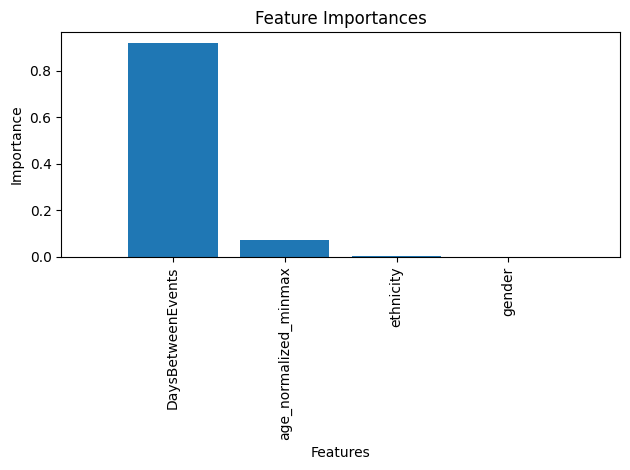

In [31]:
# Plot the feature importances
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.ylabel('Importance')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

In [32]:
# Final Step: Save the Model (optional)
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [33]:
# Optional: Hyperparameter Tuning with GridSearchCV (if desired)
from sklearn.model_selection import GridSearchCV

In [34]:
# Save the best model
joblib.dump(grid_search.best_estimator_, 'best_random_forest_model.pkl')

NameError: name 'grid_search' is not defined

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [36]:
# Step 1: Define the RandomForestClassifier
rf = RandomForestClassifier()

In [37]:
# Step 2: Define the hyperparameters you want to tune
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required at each leaf node
    'bootstrap': [True, False]        # Whether bootstrap samples are used when building trees
}

In [38]:
# Step 3: Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [ ]:
# Step 4: Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)  # X_train and y_train should be your training data

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  49.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.5min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 1.7min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time= 2.4min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  47.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  50.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  50.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; tota

In [ ]:
# Step 5: Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

In [ ]:
# Step 6: Predict using the best model
y_pred = grid_search.predict(X_test)